Data Analysis & Wrangling

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import PercentFormatter

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, KBinsDiscretizer

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


# Data Processing related to Machine Learning

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics,svm

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
# import sweetviz as sv


#    CUSTOM MADE FUNCTIONS

In [ ]:
# CREATE A SUMMARIZE FUNCTION DOING ".DESCRIBE()" & ".INFO" SIMULTANEOUSLY

def profile_data(data):

    """Panda Profiling Function

    Args:
        data (DataFrame): A data frame to profile

    Returns:
        DataFrame : a data frame with profiled data

    """

    return pd.concat(
        [
            pd.Series(data.dtypes , name = "Dtype") ,
            # counts
            pd.Series( data.count()        , name = "Count") ,
            pd.Series( data.isnull().sum() , name = "NA Count") ,
            pd.Series( data.nunique()      , name = "Count Unique") ,
            pd.Series( data.duplicated().sum()   , name = "Count Duplicate"),

            # Stats
            pd.Series( data.min( skipna = True)   , name = "Min" ) ,
            pd.Series( data.max( skipna = True ) , name = "Max" ) ,
            pd.Series( data.mean()          , name = "Mean") ,
            pd.Series( data.median()        , name = "Median") ,
            pd.Series( data.mode().iloc[0]  , name = "Mode") ,
        ] ,
        axis = 1
    )

#### PREPARE CATEGORICAL VS TARGET ###

In [ ]:
def prepare_table_cat_and_target(
    data ,
    category_col ,
    target_col ,
    sort_order = False
):


    # category_col = "Sex"
    # target_col = "Survived"

    # data = titanic_df.copy()
    # sort_order = False

   # data[category_col] = data[category_col].astype("category")
    #data[target_col] = data[target_col].astype("category")

    data_category_df = data \
        .value_counts(category_col, normalize= True) \
        .mul(100 ) \
        .round(2) \
        .rename('Percentage_dataset') \
        .to_frame()

    data_target_df = data[[category_col,target_col]] \
        .groupby(category_col) \
        .mean() \
        .mul(100) \
        .round(2) \
        .sort_values( by = target_col , ascending= sort_order )

    data_catarget_df = data_category_df \
        .merge(
            data_target_df ,
            how = "left" ,
            left_index = True ,
            right_index = True ,
        ) \
        .sort_values( by = category_col , ascending = sort_order) \
        .reset_index()
    return data_catarget_df

#### PLOT CATEGORICAL VS TARGET ###

In [ ]:
def plot_cat_and_target(
    data ,
    category_col ,
    target_col ,
    figure_size = (10, 10) ,
    **kwargs
):
    data[category_col] = data[category_col].astype("category")
    #data = test_df.copy()
    #sort_order = False

    #data["Pclass"] = data["Pclass"].astype("category")
    #category_col = "Pclass"
    #target_col   = "Survived"
    #figure_size = (10, 10)
    plt.figure(figsize= figure_size)
    # Plot bar chart for "percent" variable
    sns.barplot(data= data, y= category_col, x='Percentage_dataset', orient= "h" , **kwargs)

    # Overlay line plot for "target" variable
    ax2 = plt.gca().twiny()
    sns.pointplot(
        data= data ,
        y = category_col,
        x = target_col,
        color='red',
        linestyles= "-" ,
        markers= "o" ,
        ax=ax2 ,
        join= True ,
    )

    # Set labels and title, axes ...
    plt.xlabel('Percent', color='blue')
    ax2.set_xlabel(target_col, color='red')
    ax2.tick_params(axis='x', colors='red')

    plt.gca().xaxis.set_major_formatter(PercentFormatter(100))
    plt.ylabel(category_col)
    plt.title(f'{category_col} vs {target_col} in proportion')

# EXPLORATORY DATA ANALYSIS

In [ ]:
redwine_df   = pd.read_csv("winequality-red.csv")
whitewine_df = pd.read_csv("winequality-white.csv")

redwine_df["type"] = "red"
whitewine_df["type"] = "white"

Are columns matching in both ?

In [ ]:
(redwine_df.columns == whitewine_df.columns).all()
# IF yes ... :
wines_df = pd.concat( [redwine_df, whitewine_df] , axis = 0 ).reset_index(drop= True).reset_index(drop = True)

wines_df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red


In [ ]:
profile_data(wines_df)

# No missing values !

<ipython-input-4-5672125de4c4>:27: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.Series( data.mean()          , name = "Mean") ,
<ipython-input-4-5672125de4c4>:28: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.Series( data.median()        , name = "Median") ,


,Dtype,Count,NA Count,Count Unique,Count Duplicate,Min,Max,Mean,Median,Mode
fixed acidity,float64,6497.0,0.0,106.0,NaN,3.8,15.9,7.215307,7.00000,6.8
volatile acidity,float64,6497.0,0.0,187.0,NaN,0.08,1.58,0.339666,0.29000,0.28
citric acid,float64,6497.0,0.0,89.0,NaN,0.0,1.66,0.318633,0.31000,0.3
residual sugar,float64,6497.0,0.0,316.0,NaN,0.6,65.8,5.443235,3.00000,2.0
chlorides,float64,6497.0,0.0,214.0,NaN,0.009,0.611,0.056034,0.04700,0.044
free sulfur dioxide,float64,6497.0,0.0,135.0,NaN,1.0,289.0,30.525319,29.00000,29.0
total sulfur dioxide,float64,6497.0,0.0,276.0,NaN,6.0,440.0,115.744574,118.00000,111.0
density,float64,6497.0,0.0,998.0,NaN,0.98711,1.03898,0.994697,0.99489,0.9972
pH,float64,6497.0,0.0,108.0,NaN,2.72,4.01,3.218501,3.21000,3.16
sulphates,float64,6497.0,0.0,111.0,NaN,0.22,2.0,0.531268,0.51000,0.5


 Based on the original paper in which the dataset is referred to, Quality 0 is very bad and 10 is excellent. In this dataset, we range from 3 to 9.

# Distribution of Wine (Red/White) and Quality (1 to 10)

In [ ]:
# white_quality = wines_df[wines_df["type"] == "white"]["quality"].value_counts()
# red_quality = wines_df[wines_df["type"] == "red"]["quality"].value_counts()
# type_wines_prop = wines_df["type"].value_counts()

In [ ]:
# wines_pie_df = wines_df[["type","quality","citric acid"]] \
#     .groupby(["quality","type"]) \
#     .count() \
#     .reset_index() \
#     .rename( columns= ({ "citric acid" : "count"}))

In [ ]:
white_quality  = wines_pie_df[wines_pie_df["type"] == "white"]
red_quality    = wines_pie_df[wines_pie_df["type"] == "red"]

###   Distribution of Wine (Red/White )and Quality (1 to 10)  ######

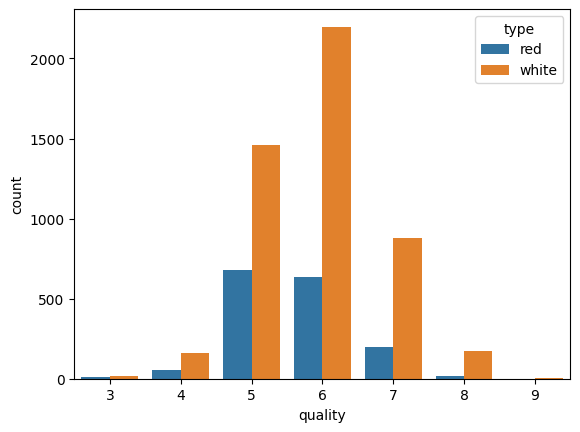

In [ ]:
sns.countplot(x='quality',data = wines_df , hue = "type"  )
plt.show()

###   Correlation Plot  ######

<ipython-input-18-ffa8b01c095f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wines_df.corr() ,


<Axes: >

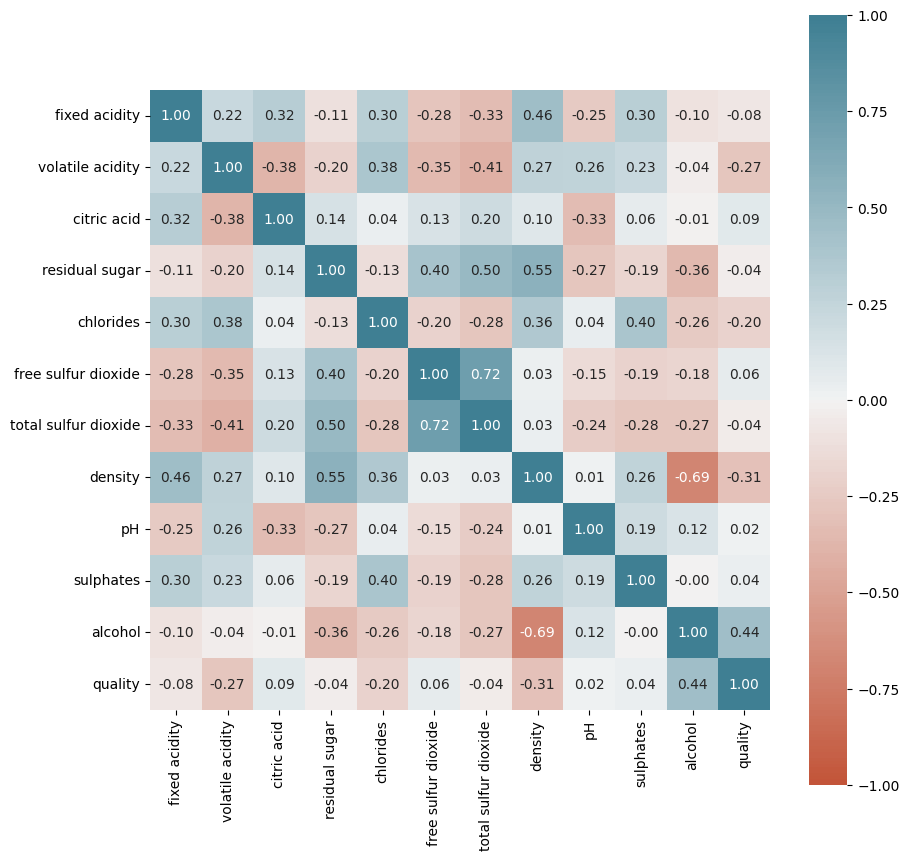

In [ ]:
plt.figure( figsize= (10,10))
sns.heatmap(
    wines_df.corr() ,
    annot= True,
    fmt=".2f",
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    #cmap='coolwarm',
    square=True
)
# plt.savefig('DevAcademy\\Projects\\Week08_UnsupervisedLearning\\pictures\\corr_matrx.jpg', dpi = 150)

Every pair of metrics shows up twice.
This function removes one version of each pair (along with pricipal axis in which all correlations equal 1.0)

In [ ]:
# Fetch top correlations
# Return a copy of dataframe with only metric columns
def drop_dims(df):
    df= df.copy()
    for i, e in zip(df.columns.values, df.dtypes):
        if e not in [np.float64, np.int64]:
            df.drop(i, inplace=True, axis=1)
    return df


# Every pair of metrics shows up twice. This function removes one version of each pair (along with pricipal axis in which all correlations equal 1.0)
def get_redundant_pairs(df):
    '''
    Get diagonal and lower triangular pairs of correlation matrix
    '''

    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop


# Return the highest correlations
def get_top_abs_correlations(df, n=3):
    df= drop_dims(df)
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [ ]:
print("Top Absolute Correlations: \n")
get_top_abs_correlations(wines_df)

Top Absolute Correlations



free sulfur dioxide  total sulfur dioxide    0.720934
density              alcohol                 0.686745
residual sugar       density                 0.552517
dtype: float64

In [ ]:
# Create a subplot showing a histogram for each metric, differientating between "white" and "red" wines.

def show_metric_dist(df, hue_user , fig_size ,title):
    plt.style.use('seaborn-whitegrid')
    plt.rcParams['figure.figsize']= [10, 8]
    fig = plt.figure( figsize= fig_size )
    plt.subplots_adjust(hspace=0.4)

    fig.suptitle(title, fontsize=20, y=0.98)
    j=1
    for i, e in zip(df.columns.values, df.dtypes):
        if e not in [np.float64, np.int64]:
            continue
        ax=fig.add_subplot(3, 4, j)
        sns.histplot(  data= df[[ hue_user, i]] , x = df[i], bins= 50 , hue = hue_user , legend = False)
        #df[i].hist(bins=50  )
        #ax.set_title(i)
        ax.set_ylabel("")
        j+=1

The plots above show that multiple metric are skewed in terms of distribution.
As I will use K-means and Gaussian Mixture Model, it is recommended for the data to follow a normal distribution. The normalised data then needs to be scaled before input into the ML algorithm.

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [ ]:
# The normalisation is done using the BoxCox transformation (see scikit learn tutorial for more details)
# I first dropped "quality" feature as I am not particularly interested in it when it comes to clustering.

wines_mets = drop_dims(wines_df).drop("quality", axis = 1).reset_index(drop = True )
wines_norm = wines_mets.apply(lambda x: stats.boxcox(x+1e-8)[0], axis = 0)

In [ ]:
scaler_minmax   = MinMaxScaler()
scaler_robust   = RobustScaler()
scaler_standard = StandardScaler()

In [ ]:
wines_norm    = pd.DataFrame(wines_norm)
wines_scaled  = pd.DataFrame(scaler_minmax.fit_transform(wines_norm), columns=wines_norm.columns)

In [ ]:
wines_minmax   = pd.DataFrame(scaler_minmax.fit_transform(wines_scaled), columns=wines_mets.columns)
wines_robust   = pd.DataFrame(scaler_robust.fit_transform(wines_scaled), columns=wines_mets.columns)
wines_standard = pd.DataFrame(scaler_standard.fit_transform(wines_scaled), columns=wines_mets.columns)

Show an example of a record with scaling applied

In [ ]:
# Dataset before any operation
wines_mets.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [ ]:
# Dataset after normalisation
wines_norm.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6.497000e+03,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.703755,-1.435845,-0.841944,1.120234,-6.705277,7.817182e+00,66.763608,-0.005794,0.554869,-0.800535,0.543218
std,0.012000,0.604843,0.245762,0.667428,1.679511,2.865497e+00,29.648691,0.003394,0.008759,0.345084,0.001553
min,0.630624,-3.672334,-1.596468,-0.536022,-17.284432,1.000000e-08,4.264076,-0.015196,0.521606,-2.187009,0.538539
25%,0.696366,-1.818134,-0.926525,0.556632,-7.749788,5.820222e+00,47.510394,-0.008437,0.549188,-1.030848,0.541934
50%,0.703800,-1.479453,-0.829890,0.993101,-6.812290,8.042848e+00,69.087616,-0.005448,0.554941,-0.789053,0.543200
75%,0.710805,-1.044545,-0.711334,1.731208,-5.550659,9.804092e+00,88.140315,-0.003125,0.560777,-0.575709,0.544440
max,0.743110,0.429347,0.596498,2.903238,-0.554210,2.719314e+01,216.587358,0.025123,0.588597,0.593666,0.547113


In [ ]:
# Dataset after normalisation & scaling (ranging between 0 and 1)
wines_minmax.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.650133,0.545262,0.344065,0.481573,0.632338,0.287469,0.294360,0.233174,0.496521,0.498610,0.545778
std,0.106679,0.147462,0.112068,0.194062,0.100388,0.105376,0.139639,0.084177,0.130755,0.124101,0.181151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.584444,0.452059,0.305496,0.317700,0.569905,0.214033,0.203681,0.167640,0.411721,0.415784,0.395985
50%,0.650531,0.534630,0.349562,0.444608,0.625942,0.295768,0.305306,0.241769,0.497602,0.502740,0.543658
75%,0.712808,0.640662,0.403624,0.659220,0.701352,0.360535,0.395040,0.299381,0.584713,0.579464,0.688291
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Dataset after normalisation & scaling (reducing influence of outliers with robust-scaling)
wines_robust.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,-0.003098,0.056371,-0.056018,0.108237,0.048662,-0.056645,-0.057199,-0.065246,-0.006247,-0.025229,0.007253
std,0.831059,0.781866,1.142065,0.568229,0.763716,0.719275,0.729726,0.638959,0.755842,0.758193,0.619731
min,-5.067826,-2.834684,-3.562313,-1.301852,-4.761949,-2.018853,-1.595463,-1.835178,-2.876434,-3.071491,-1.859898
25%,-0.514841,-0.437805,-0.449066,-0.371597,-0.426304,-0.557906,-0.531067,-0.562688,-0.496443,-0.531256,-0.505201
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.485159,0.562195,0.550934,0.628403,0.573696,0.442094,0.468933,0.437312,0.503557,0.468744,0.494799
max,2.722464,2.467458,6.628470,1.626236,2.845709,4.806957,3.630323,5.755442,2.904159,3.038012,1.561180


In [ ]:
# Dataset after normalisation & scaling (dividing by standard deviation)
wines_standard.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03
mean,6.999344e-16,-2.449770e-16,-1.749836e-17,-3.149705e-16,3.849639e-16,-7.349311e-16,-2.799737e-16,4.549573e-16,1.749836e-17,-1.224885e-16,5.074524e-16
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00
min,-6.094776e+00,-3.697919e+00,-3.070371e+00,-2.481741e+00,-6.299435e+00,-2.728247e+00,-2.108165e+00,-2.770238e+00,-3.797627e+00,-4.018100e+00,-3.013071e+00
25%,-6.158200e-01,-6.320951e-01,-3.441815e-01,-8.445036e-01,-6.219618e-01,-6.969520e-01,-6.494282e-01,-7.785798e-01,-6.485928e-01,-6.674633e-01,-8.269607e-01
50%,3.727830e-03,-7.210311e-02,4.905358e-02,-1.904964e-01,-6.372171e-02,7.875886e-02,7.839088e-02,1.021205e-01,8.266033e-03,3.327771e-02,-1.170378e-02
75%,5.875567e-01,6.469949e-01,5.314926e-01,9.154853e-01,6.875258e-01,6.934443e-01,7.210555e-01,7.865859e-01,6.745363e-01,6.515630e-01,7.867660e-01
max,3.279878e+00,3.083998e+00,5.853433e+00,2.671661e+00,3.662698e+00,6.762334e+00,5.053690e+00,9.110340e+00,3.850843e+00,4.040495e+00,2.507614e+00


In [ ]:
# Attaching the wine colour to spot the differences in the metric distribution
wines_mets["type"] = wines_df["type"].reset_index(drop = True)
wines_norm["type"] = wines_df["type"].reset_index(drop = True)
wines_minmax["type"] = wines_df["type"].reset_index(drop = True)
wines_robust["type"] = wines_df["type"].reset_index(drop = True)
wines_standard["type"] = wines_df["type"].reset_index(drop = True)

<ipython-input-21-0ad9e77df135>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-21-0ad9e77df135>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-21-0ad9e77df135>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API in

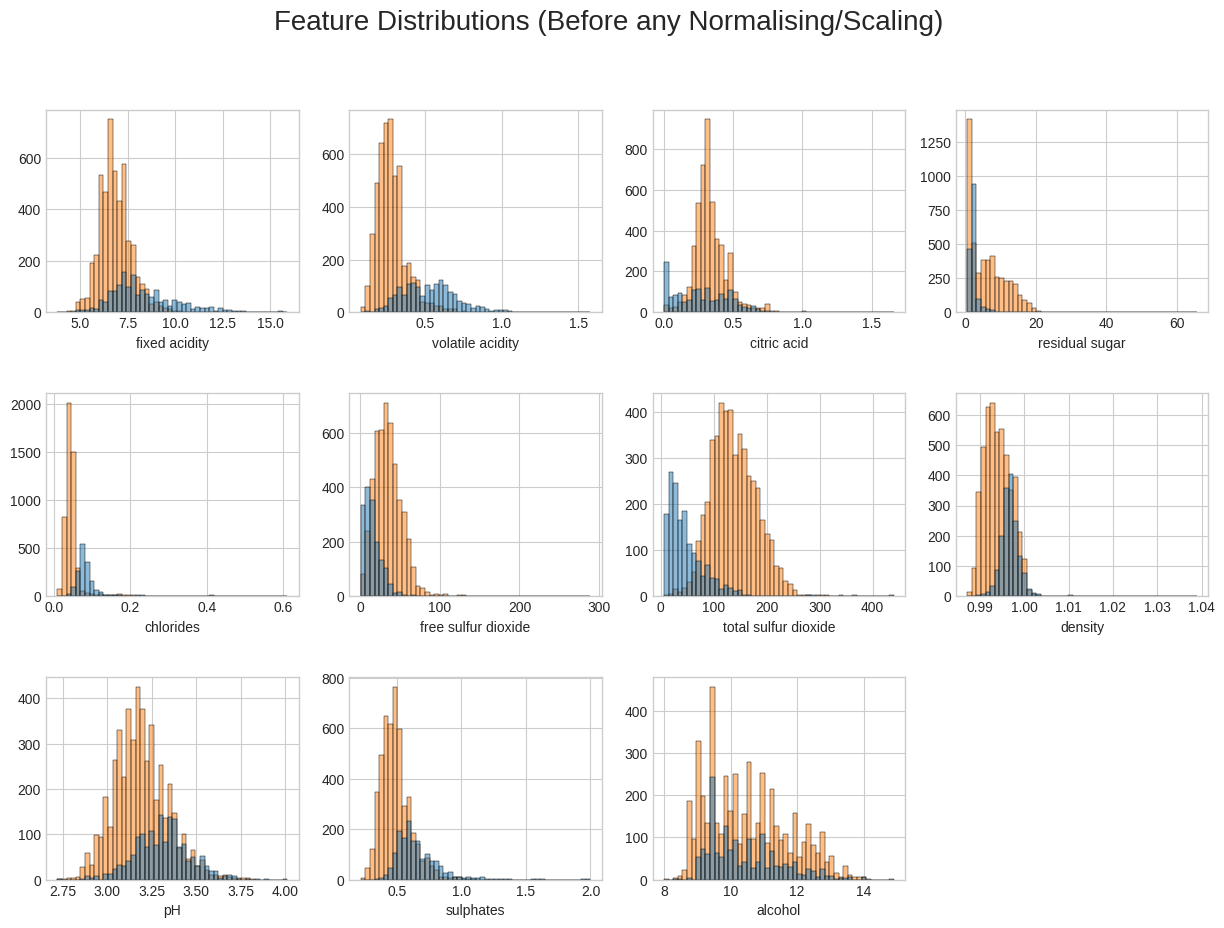

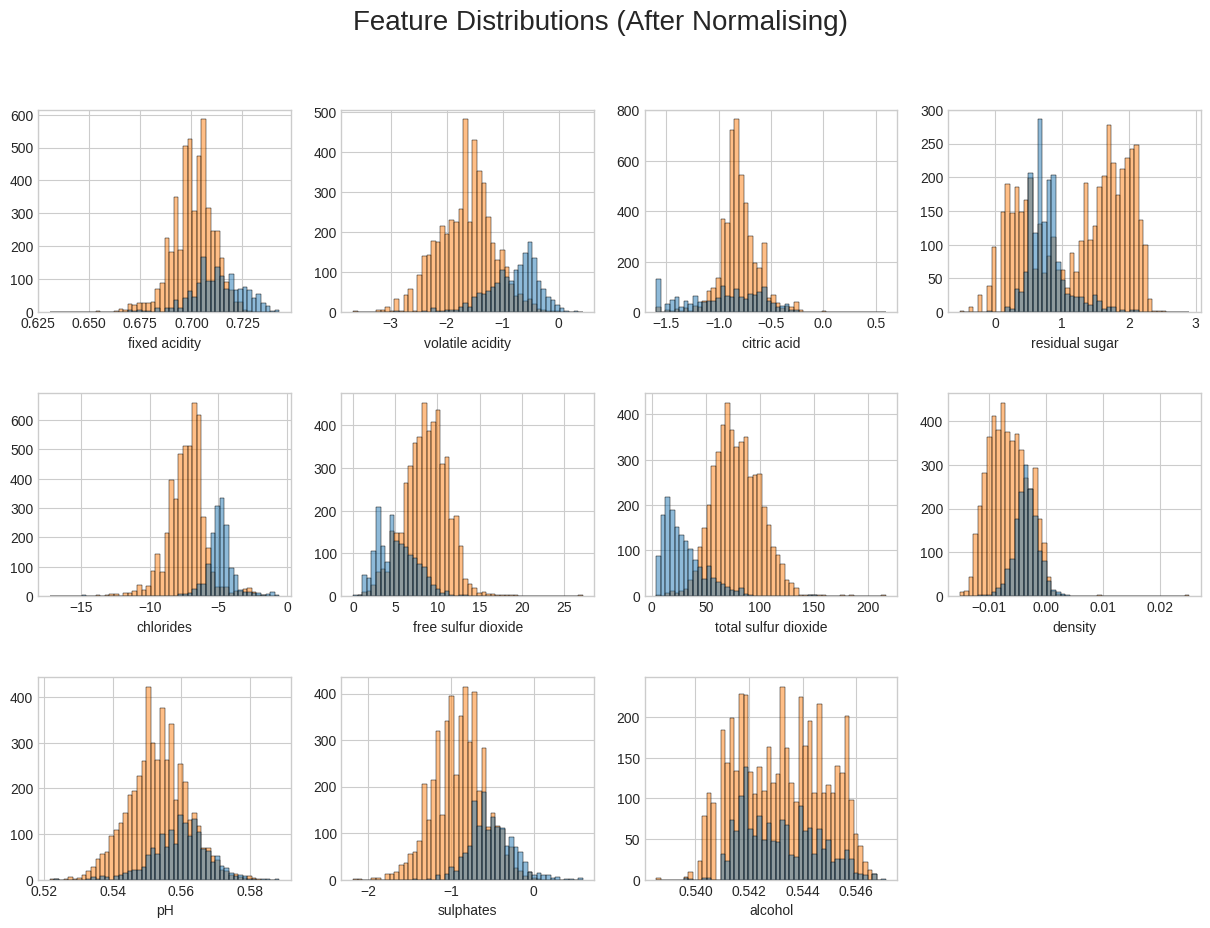

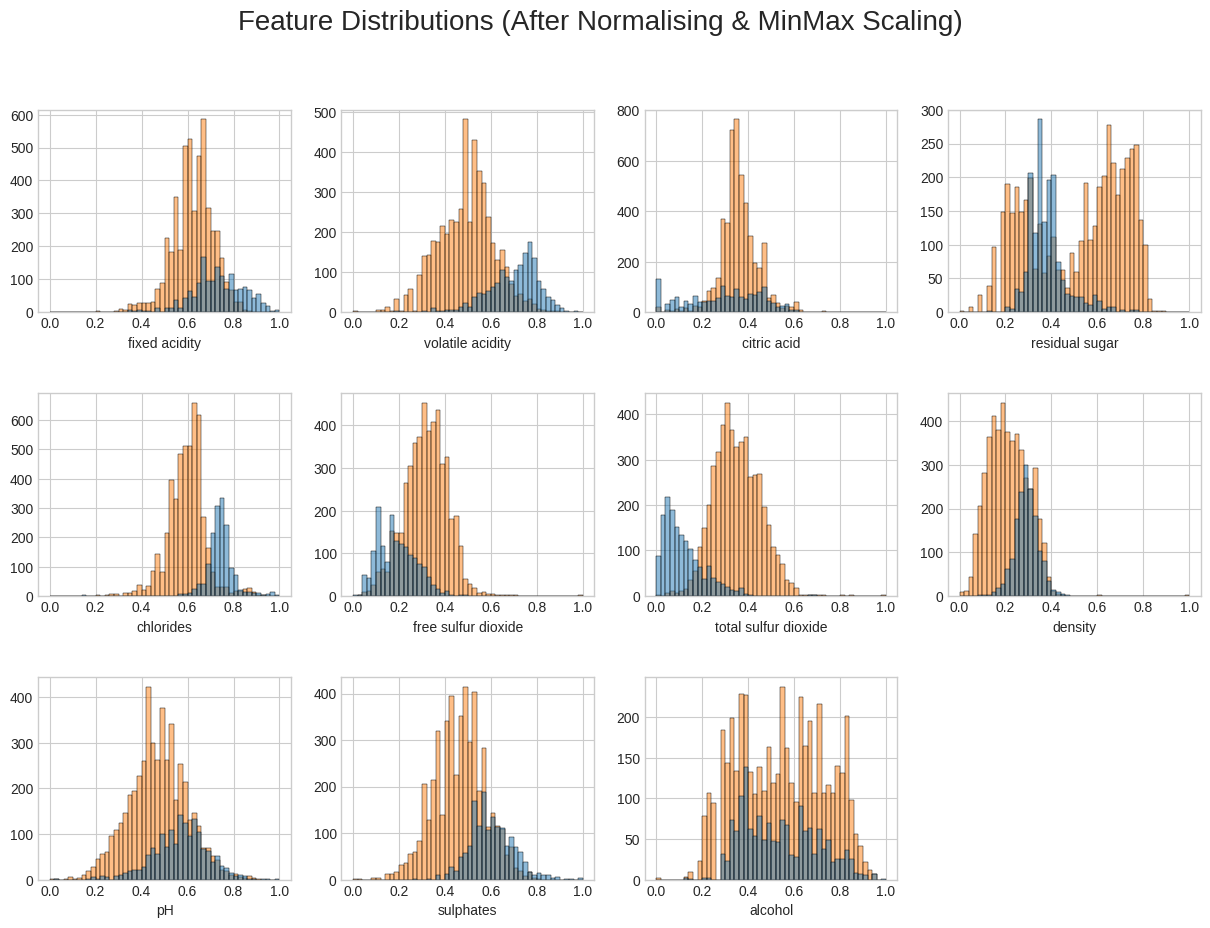

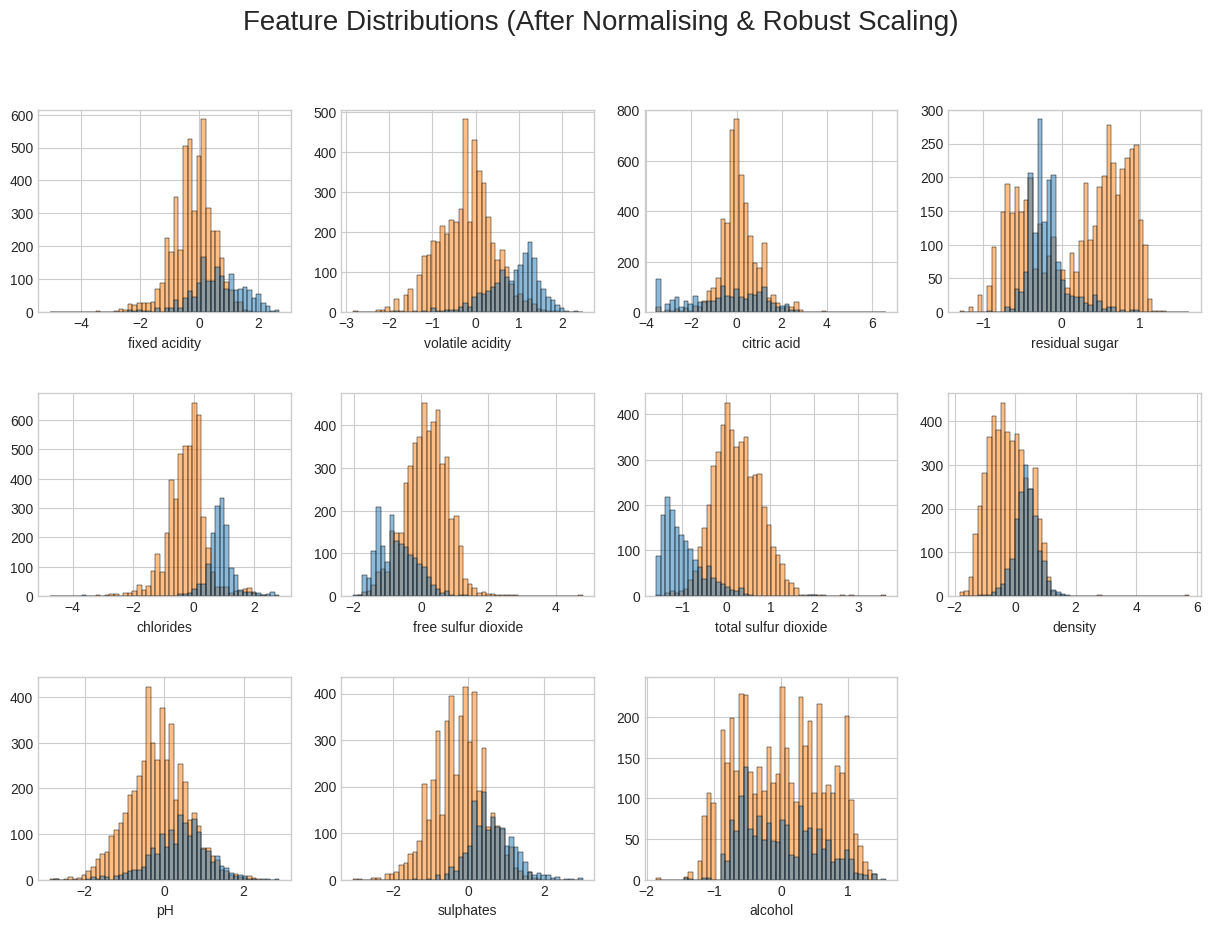

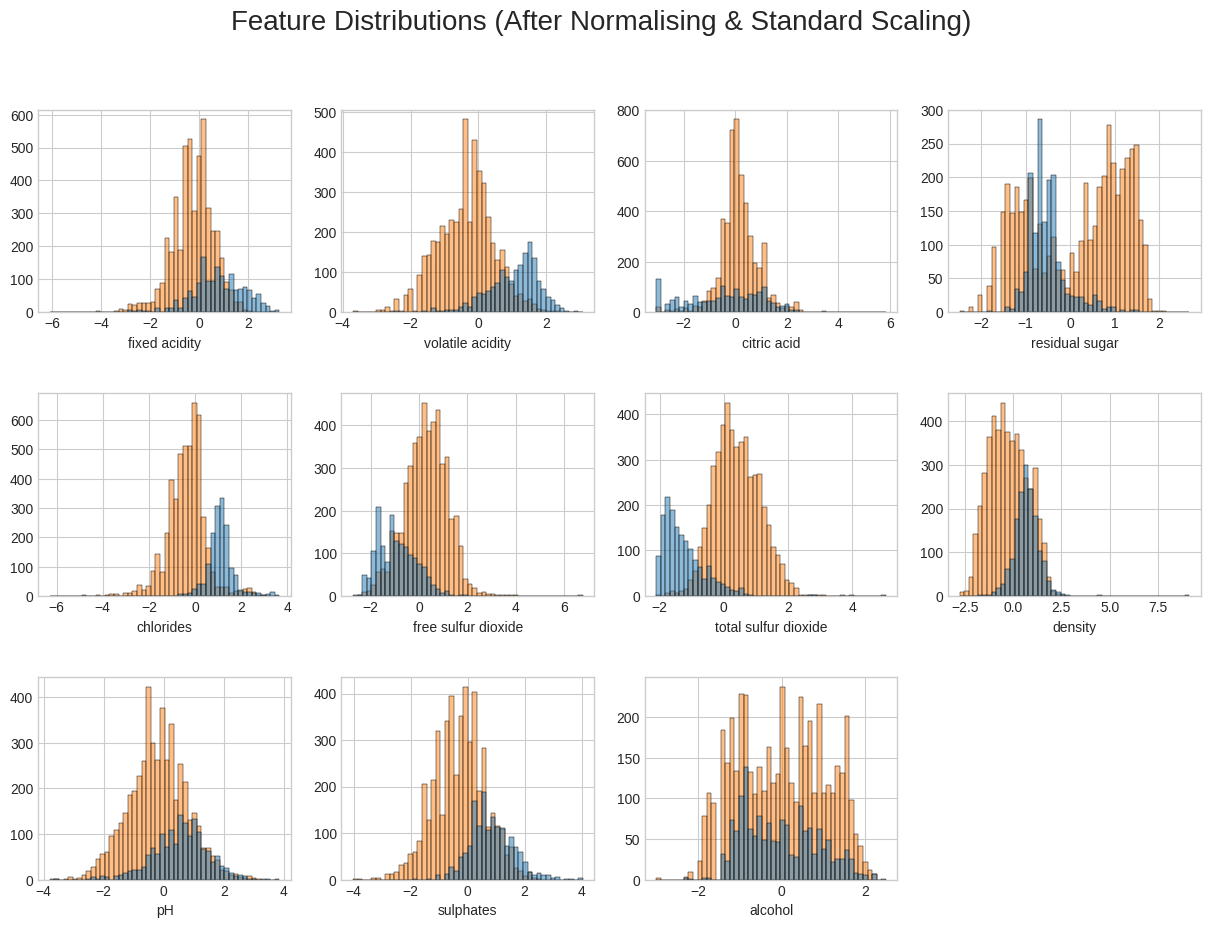

In [ ]:
show_metric_dist(wines_mets    , hue_user = "type", fig_size= (15, 10) ,title='Feature Distributions (Before any Normalising/Scaling)')
show_metric_dist(wines_norm    , hue_user = "type", fig_size= (15, 10) ,title='Feature Distributions (After Normalising)')
show_metric_dist(wines_minmax  , hue_user = "type", fig_size= (15, 10) ,title='Feature Distributions (After Normalising & MinMax Scaling)')
show_metric_dist(wines_robust  , hue_user = "type", fig_size= (15, 10) ,title='Feature Distributions (After Normalising & Robust Scaling)')
show_metric_dist(wines_standard, hue_user = "type", fig_size= (15, 10) ,title='Feature Distributions (After Normalising & Standard Scaling)')

#    PRINCIPAL COMPONENT ANALYSIS

Apply PCA by fitting the data with the same number of dimensions as features

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# We opted for minmax() as the range of values is similar for all metric features.

wines_minmax   = wines_minmax.drop( columns = "type")
# wines_standard = wines_standard.drop( columns = "type")

In [ ]:
pca = PCA(n_components=wines_minmax.shape[1], random_state= 1 )
pca.fit(wines_minmax)

PCA(n_components=11, random_state=1)

ransform wines_norm using the PCA fit above

In [ ]:
pca_samples = pca.transform(wines_minmax)
for i in range(wines_minmax.shape[1]):
    first_n = pca.explained_variance_ratio_[0:i+1].sum()*100
    print('Percent variance explained by first {} components: {:.1f}%'.format(i+1, first_n))

Percent variance explained by first 1 components: 32.0%
Percent variance explained by first 2 components: 53.6%
Percent variance explained by first 3 components: 65.2%
Percent variance explained by first 4 components: 75.8%
Percent variance explained by first 5 components: 83.6%
Percent variance explained by first 6 components: 89.3%
Percent variance explained by first 7 components: 93.1%
Percent variance explained by first 8 components: 95.9%
Percent variance explained by first 9 components: 98.1%
Percent variance explained by first 10 components: 99.7%
Percent variance explained by first 11 components: 100.0%


In [ ]:
print('\nFirst principle component contributions:\n')
first_comp= zip(wines_minmax.columns.values, pca.components_[0])

for i, j in first_comp:
    print(i, '%.3f' % j)



First principle component contributions:

fixed acidity -0.026
volatile acidity -0.193
citric acid 0.130
residual sugar 0.651
chlorides -0.035
free sulfur dioxide 0.263
total sulfur dioxide 0.415
density 0.158
pH -0.208
sulphates -0.131
alcohol -0.440


In [ ]:
pca_3d = PCA(n_components=3, random_state=51)
pca_3d.fit(wines_minmax)

PCA(n_components=3, random_state=51)

ransform wines_minmax using the PCA fit above

In [ ]:
pca_samples_3d = pca_3d.transform(wines_minmax)

pca_samples_3d

array([[-0.27960267, -0.43045149,  0.17094896],
       [-0.17934433, -0.39546161,  0.14830832],
       [-0.21901671, -0.3823293 ,  0.09826958],
       ...,
       [-0.0571093 ,  0.03352684, -0.25346257],
       [-0.35891934,  0.3986716 ,  0.08334184],
       [-0.32578378,  0.42923255, -0.11128831]])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

<ipython-input-68-f4ec761083ab>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



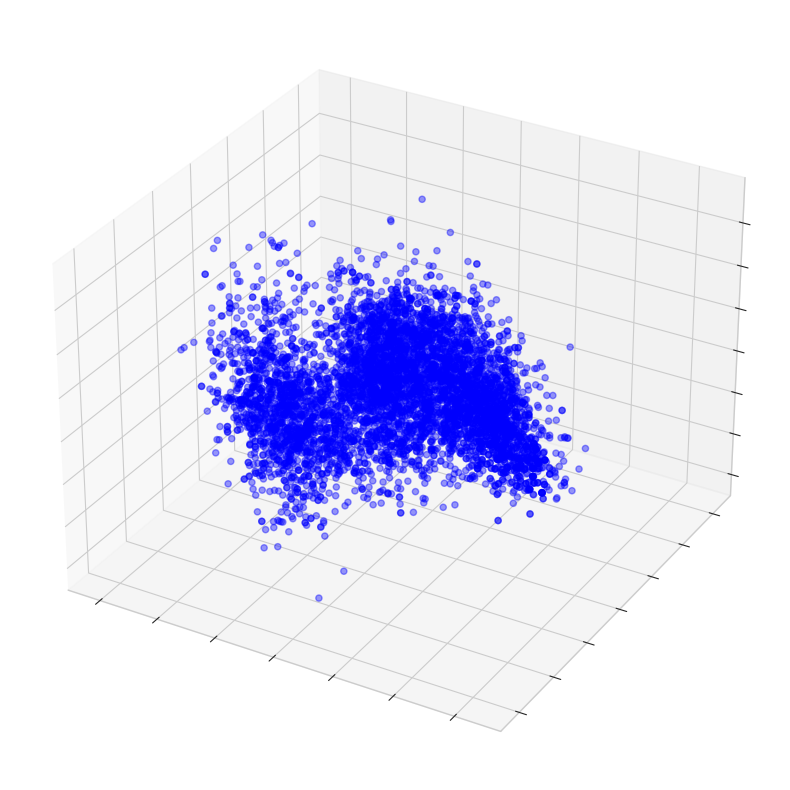

In [ ]:
# Static Version

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize= (10, 10))
ax = Axes3D(fig)

ax = fig.add_subplot(111, projection='3d')  # Specify 3D projection explicitly
ax.scatter(pca_samples_3d[:,0], pca_samples_3d[:,1], pca_samples_3d[:,2], alpha=0.4, color= 'b')

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.show()

In [ ]:
# Dynamic Version
px.scatter_3d(
    x = pca_samples_3d[:,0] ,
    y = pca_samples_3d[:,1] ,
    z = pca_samples_3d[:,2] ,
    #color = "blue" ,
    opacity = 0.4 ,
    width = 800 ,
    height = 600
)

#    FINDING THE CLUSTER NUMBER

In [ ]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

#### 1) Using K-Means and the Elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

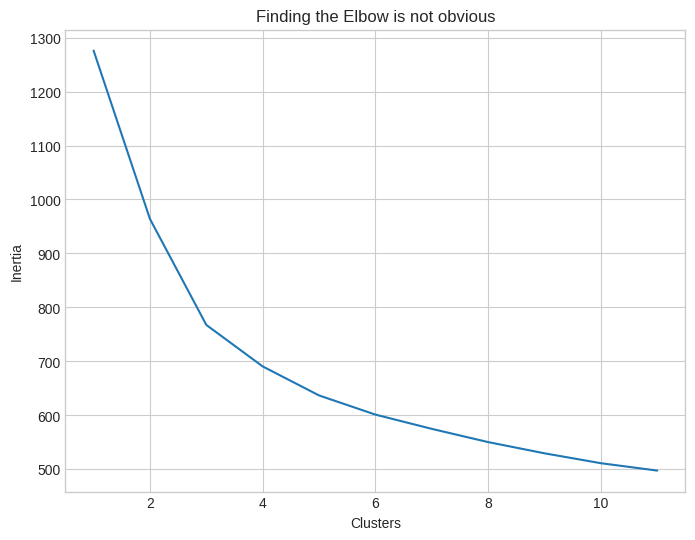

In [ ]:
inertias = []
for i in range(1, wines_minmax.shape[1]+1):
    km = KMeans(n_clusters=i).fit(wines_minmax)
    inertias.append(km.inertia_)

fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=list(range(1, 12)), y=inertias, ax=ax)
ax.set_title('Finding the Elbow is not obvious')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

### 2) Using K-means and the Silhouette method

In [ ]:
silhouette_avg = []
for i in range(2, wines_minmax.shape[1]+1):

    # initialise kmeans
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(wines_minmax)
    cluster_labels = kmeans.labels_

    # silhouette score calculation
    silhouette_avg.append(silhouette_score(wines_minmax, cluster_labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

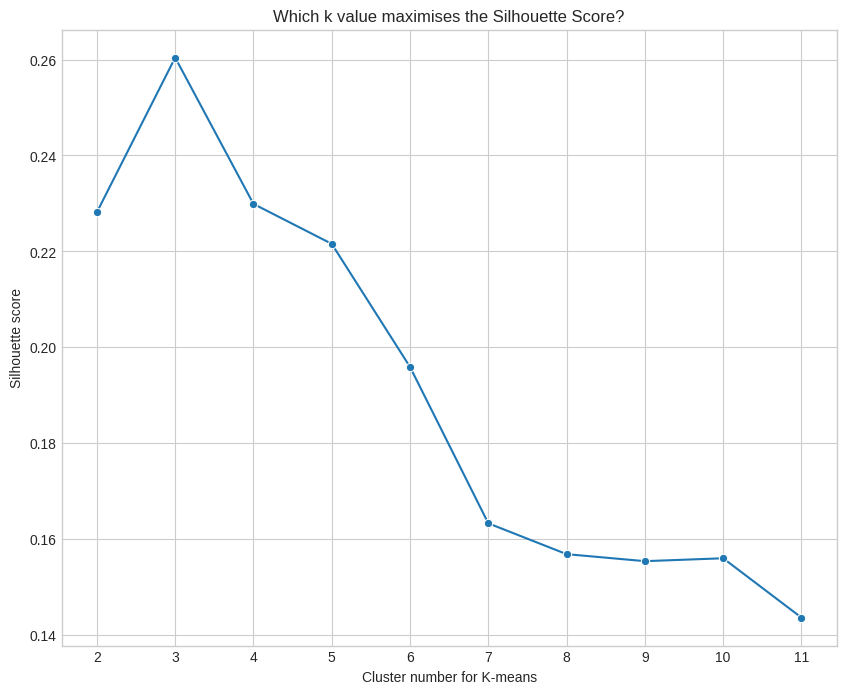

In [ ]:
# Plotting K-means Inertia against cluster numbers

sns.lineplot(x=range(2, wines_minmax.shape[1]+1), y=silhouette_avg, marker='o')
plt.xticks(range(2, wines_minmax.shape[1] + 1))
plt.xlabel('Cluster number for K-means')
plt.ylabel('Silhouette score')
plt.title('Which k value maximises the Silhouette Score?')
plt.show()

From the previous plot, it is much clearer than an ideal cluster number would be 3.


### 3) Using Gaussian Mixture and Silhouette Score

Online literature suggests theres no inertia for Gaussian Mixture Model. One could use however the Silhouette Score or the AIC/BIC metrics instead. I used the silhouette score in this case.

In [ ]:
max_k=20
# Silouhette score method
sil_scores=[]
for i in range(2, max_k+1):
    clusterer = GaussianMixture(n_components=i, random_state= 1 , n_init=5)
    clusterer.fit(wines_minmax)

    #Predict the cluster for each data point
    preds = clusterer.predict(wines_minmax)

    #Find the cluster centers
    centers = clusterer.means_

    #Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(wines_minmax)

    #Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(wines_minmax, preds)
    sil_scores.append(score)

sil_scores = pd.Series(sil_scores, index= range(2,max_k+1))
max_score  = sil_scores.max()
n_clusters = sil_scores.idxmax()
print('Max Silhouette Score: {:.3f}'.format(max_score))
print('Number of clusters assessed: {}\n'.format(max_k))

Max Silhouette Score: 0.240
Number of clusters: 20



In [ ]:
print('First 3 Silhouette Scores')
print(sil_scores[0:3])

First 3 Silhouette Scores
2    0.213150
3    0.239983
4    0.221927
dtype: float64


<ipython-input-73-ec95715a2cd9>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



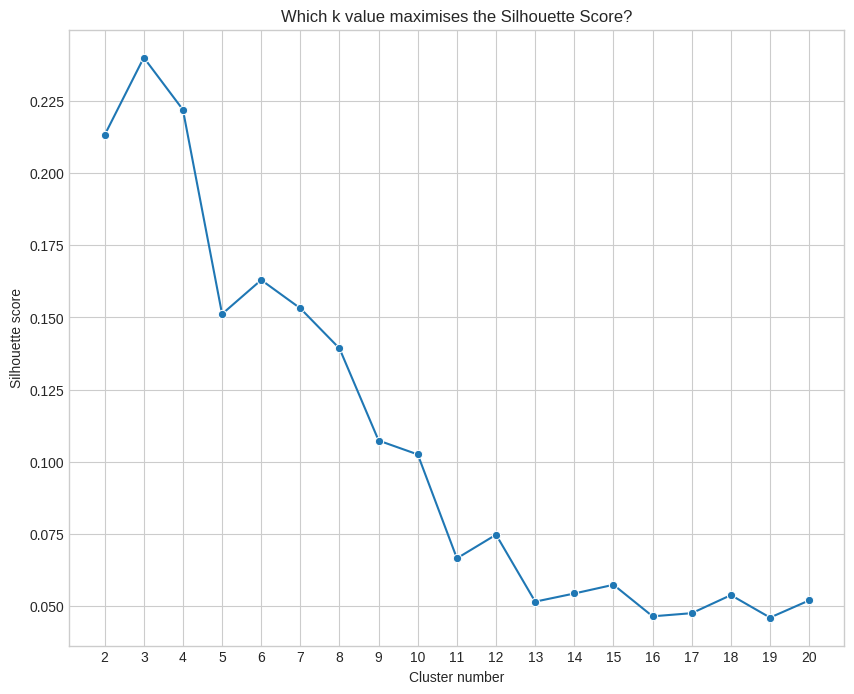

In [ ]:
# Plot Silhouette Score for Gaussian Mixture

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,8))
sns.lineplot(x=sil_scores.index.values, y=sil_scores, marker='o')
plt.xticks(sil_scores.index.values)
plt.xlabel('Cluster number')
plt.ylabel('Silhouette score')
plt.title('Which k value maximises the Silhouette Score?')
plt.show()

AS observed for K-means, the optimal number of clusters seem to be 3.

If one is happy with the suggested cluster number, it is now time to refit the model to the K cluster number with the max silhouette score.

### Using a 3-cluster Gaussian Mixture Model

In [ ]:
clusterer = GaussianMixture(n_components= n_clusters, random_state=51, n_init=5)
clusterer.fit(wines_minmax)

GaussianMixture(n_components=3, n_init=5, random_state=51)

In [ ]:
# Predict the cluster for each data point & Find the cluster centers

preds = clusterer.predict(wines_minmax)
centers = clusterer.means_

In [ ]:
# Append cluster labels

pca_3d_clusters= np.append(pca_samples_3d, preds.reshape(-1, 1), axis=1)
#append wine type (red, white)
pca_3d_clusters= np.append(pca_3d_clusters, np.asarray(wines_df['type']).reshape(-1, 1), axis=1)

<ipython-input-80-0a0afb26d83f>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



[Text(-0.8, 0, ''),
 Text(-0.6000000000000001, 0, ''),
 Text(-0.4, 0, ''),
 Text(-0.19999999999999996, 0, ''),
 Text(0.0, 0, ''),
 Text(0.19999999999999996, 0, ''),
 Text(0.40000000000000013, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, '')]

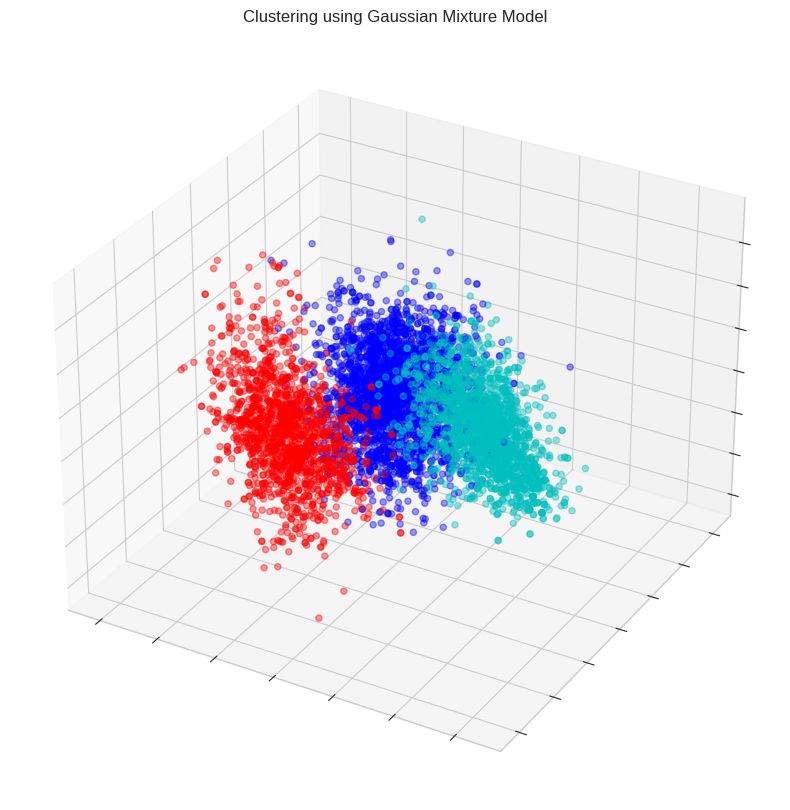

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize= (10, 10))

ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')  # Specify 3D projection explicitly

#mapping= {0:'b', 1:'c', 2:'g'}
mapping= {0:'r', 1:'c', 2:'b'}
colors= [mapping[x] for x in preds]
ax.scatter(pca_3d_clusters[:,0], pca_3d_clusters[:,1], pca_3d_clusters[:,2], alpha=0.4, color= colors, marker= 'o')
ax.set_title("Clustering using Gaussian Mixture Model")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])


In [ ]:
mapping = {0: 'r', 1: 'c', 2: 'b'}
colors = [mapping[x] for x in preds]

fig = px.scatter_3d(
    x=pca_samples_3d[:, 0],
    y=pca_samples_3d[:, 1],
    z=pca_samples_3d[:, 2],
    color=colors,
    opacity=0.4,
    width=800,
    height=600
)

# Add title
fig.update_layout(title='3D Scatter Plot of Principal Components')

# Set axis labels
fig.update_layout(scene=dict(
    xaxis=dict(title='Principal Component 1'),
    yaxis=dict(title='Principal Component 2'),
    zaxis=dict(title='Principal Component 3')
))

# Show plot
fig.show()

One can clearly see the 3 clusters distinctly appearing. With the opacity distinction, we can nearly see some population differences within the cluster

# Using 3-cluster K Means Model

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state=1)
kmeans.fit(wines_minmax) # no transforming, just fitting
KMeans(n_clusters=3, random_state=1)
clusters = kmeans.predict(wines_minmax)
clusters



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
pca_3d_clusters= np.append(pca_samples_3d, clusters.reshape(-1, 1), axis=1)
pca_3d_clusters= np.append(pca_3d_clusters, np.asarray(wines_df['type']).reshape(-1, 1), axis=1)

pca_3d_clusters

array([[-0.2796026680350407, -0.4304514853569184, 0.17094896288041533,
        0.0, 'red'],
       [-0.17934432908581618, -0.3954616073914917, 0.14830831762427513,
        0.0, 'red'],
       [-0.2190167136829716, -0.3823293024123417, 0.09826958032042739,
        0.0, 'red'],
       ...,
       [-0.05710930377306911, 0.03352683755132285, -0.25346257220616086,
        2.0, 'white'],
       [-0.3589193410032123, 0.39867159745626424, 0.08334183789797686,
        2.0, 'white'],
       [-0.3257837768930513, 0.4292325522226003, -0.11128830922166026,
        2.0, 'white']], dtype=object)

<ipython-input-88-5e8809a254c4>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



[Text(-0.8, 0, ''),
 Text(-0.6000000000000001, 0, ''),
 Text(-0.4, 0, ''),
 Text(-0.19999999999999996, 0, ''),
 Text(0.0, 0, ''),
 Text(0.19999999999999996, 0, ''),
 Text(0.40000000000000013, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, '')]

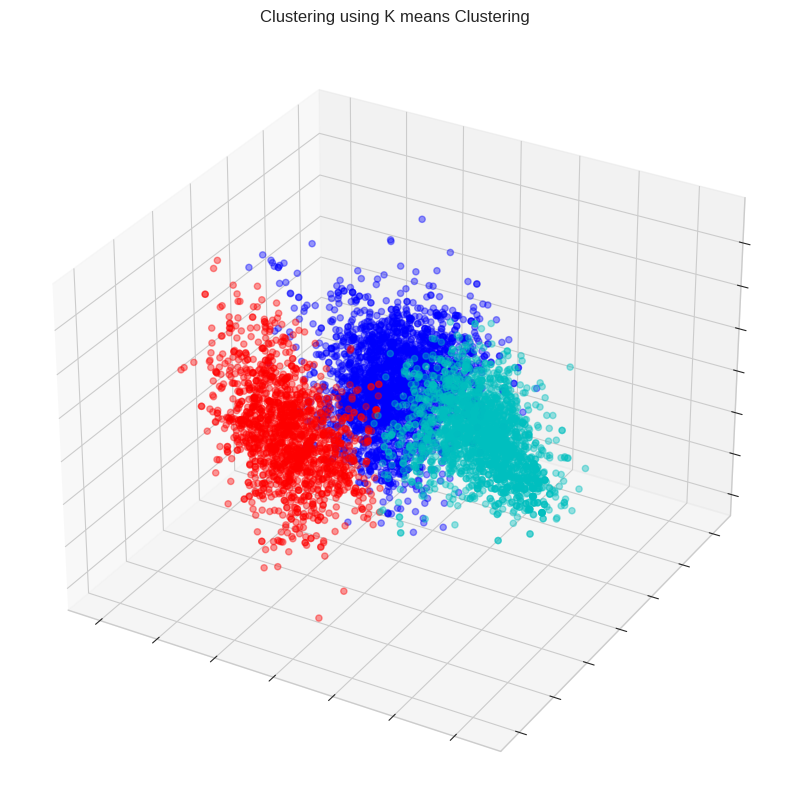

In [ ]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize= (10, 10))

ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')  # Specify 3D projection explicitly

mapping= {0:'r', 1:'c', 2:'b'}
colors= [mapping[x] for x in clusters]
ax.scatter(pca_3d_clusters[:,0], pca_3d_clusters[:,1], pca_3d_clusters[:,2], alpha=0.4, color= colors, marker= 'o')

ax.set_title("Clustering using K means Clustering")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

In [ ]:

# Dynamic Version

mapping = {0: 'r', 1: 'c', 2: 'b'}
colors = [mapping[x] for x in preds]

fig = px.scatter_3d(
    x=pca_samples_3d[:, 0],
    y=pca_samples_3d[:, 1],
    z=pca_samples_3d[:, 2],
    color=colors,
    opacity=0.4,
    width=800,
    height=600
)

fig.update_layout(title="Clustering using K means Clustering")
fig.update_layout(scene=dict(
    xaxis=dict(title='Principal Component 1'),
    yaxis=dict(title='Principal Component 2'),
    zaxis=dict(title='Principal Component 3')
))

fig.show()

We can see our 3 clusters again, looking quite similar to the previous example with Gaussian Mixture. Some minor differences can be spotted at the top edge of blue cluster and right-hand-side cyan cluster.

The clusters above did **not** include the wine colour in the results. Let us append the wine colour and further segment our results to see its possible effects.

# Separating by wine colour

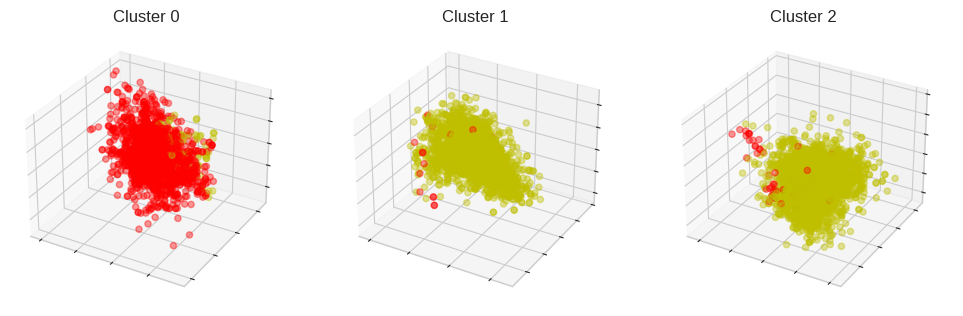

In [ ]:
fig = plt.figure( figsize = (12, 7))

for i in range(3):
    ax=fig.add_subplot(1, 3, i+1, projection='3d')

    cluster_subset = pca_3d_clusters[pca_3d_clusters[:,3]==i]
    type_colors    = np.where(cluster_subset[:,4]=='red', 'r', 'y')
    ax.scatter(
        cluster_subset[:,0], cluster_subset[:,1], cluster_subset[:,2],
        alpha=0.4, color= type_colors, marker= 'o'
    )

    ax.set_title('Cluster {}'.format(i))

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])


Separating the 3 clusters into separate plots and integrating the wine colour, one can see a cluster for red wine and two clusters for white wine. In all clusters, some wines from another colour type may be integrated. This is either due to possible error in the algorithm, or potentially some features (eg residual sugar or alcohol) shared by both particular cases of red and white wines.

In [ ]:
wines_df['cluster']= pca_3d_clusters[:, 3]

for i in range(3):
    print('Cluster {}'.format(i))
    subset= wines_df[wines_df['cluster']==i]
    display(subset.describe())
    print("\n\n")

Cluster 0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.00000
mean,8.309046,0.529260,0.268302,2.490149,0.087113,15.881351,46.659851,0.996727,3.312726,0.655805,10.404802,5.61772
std,1.741305,0.178434,0.197850,1.298619,0.046982,10.409785,32.303138,0.001886,0.154364,0.168545,1.055600,0.81490
min,4.600000,0.120000,0.000000,0.800000,0.022000,1.000000,6.000000,0.990800,2.740000,0.320000,8.400000,3.00000
25%,7.100000,0.400000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.00000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,14.000000,38.000000,0.996710,3.310000,0.620000,10.100000,6.00000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,63.000000,0.997815,3.400000,0.730000,11.000000,6.00000
max,15.900000,1.580000,1.660000,15.500000,0.611000,72.000000,197.000000,1.003690,4.010000,2.000000,14.900000,8.00000





Cluster 1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,2261.000000,2261.000000,2261.000000,2261.000000,2261.000000,2261.000000,2261.000000,2261.000000,2261.000000,2261.000000,2261.000000,2261.000000
mean,6.925475,0.279080,0.346471,10.854091,0.047564,41.345865,159.356258,0.996435,3.166325,0.481079,9.850868,5.733304
std,0.740798,0.094659,0.128941,3.919526,0.015224,15.998265,40.150575,0.002274,0.141281,0.100637,0.925192,0.797724
min,3.800000,0.090000,0.000000,4.400000,0.020000,2.000000,28.000000,0.990180,2.720000,0.220000,8.400000,3.000000
25%,6.400000,0.220000,0.270000,7.700000,0.040000,30.000000,130.000000,0.995000,3.070000,0.410000,9.100000,5.000000
50%,6.900000,0.260000,0.320000,10.400000,0.046000,41.000000,159.000000,0.996320,3.160000,0.470000,9.600000,6.000000
75%,7.400000,0.320000,0.410000,13.500000,0.052000,52.000000,186.000000,0.998000,3.250000,0.540000,10.400000,6.000000
max,11.800000,0.965000,1.230000,65.800000,0.301000,131.000000,366.500000,1.038980,3.750000,1.010000,13.400000,9.000000





Cluster 2


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000
mean,6.791972,0.275204,0.325610,2.595156,0.044206,30.208810,120.663234,0.991947,3.205492,0.497887,11.098042,6.015256
std,0.915424,0.101979,0.107865,1.754515,0.026211,16.132995,35.801858,0.001711,0.155607,0.125806,1.172691,0.928868
min,3.900000,0.080000,0.000000,0.600000,0.009000,3.000000,9.000000,0.987110,2.740000,0.230000,8.000000,3.000000
25%,6.200000,0.200000,0.270000,1.400000,0.033000,19.000000,97.000000,0.990700,3.100000,0.410000,10.200000,5.000000
50%,6.700000,0.260000,0.310000,1.800000,0.039000,28.000000,118.000000,0.991880,3.200000,0.480000,11.100000,6.000000
75%,7.300000,0.320000,0.370000,3.500000,0.047000,38.000000,142.000000,0.993140,3.300000,0.560000,12.000000,7.000000
max,14.200000,1.100000,1.000000,13.000000,0.346000,289.000000,440.000000,0.998400,3.820000,1.620000,14.200000,9.000000


Looking at the tables above :
  - the main factors differentiating red wines from white wines are in terms of sulfur (both free sulfur dioxyde and total sulfur dioxyde), followed by sulphates and fixed acidity.
  
  - the two white wines categories differ mainly in terms of residual sugar, with the latter category (cluster 2) less "sweet" than category 1.